# Predicting Customer Churn in a Telecom Company to Boost Retention and Revenue


## Executive Summary

Customer churn is a critical challenge in the telecom industry, where acquiring
new customers is significantly more expensive than retaining existing ones.

In this project, I analyzed customer demographic, behavioral, and contractual
data to identify key drivers of churn and built a machine learning model to
predict customers at high risk of leaving. The analysis reveals that contract
type, tenure, and monthly charges are the strongest indicators of churn.

The final model can be used by the business to proactively target high-risk
customers with personalized retention strategies, ultimately improving revenue
stability and customer lifetime value.


## Business Context

Telecom companies operate in a highly competitive environment with low switching
costs for customers. Even a small increase in churn can result in substantial
revenue loss over time.

Reducing customer churn not only protects recurring revenue but also improves
customer lifetime value and lowers acquisition costs. This project approaches
churn prediction from a business-first perspective, focusing on actionable
insights rather than purely technical performance.


## Business Objectives

The key objectives of this analysis are:

1. Identify customers who are most likely to churn
2. Understand the primary drivers influencing customer churn
3. Build a predictive model that can support proactive retention strategies
4. Translate analytical findings into actionable business recommendations


## Data Source and Initial Inspection

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
!pip install kaggle


In [ ]:
# Importing Kaggel API key
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salmanaslams","key":"00f8dbc1afa6b04323088d2d9fbf46d7"}'}

In [ ]:


# Create kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the directory
!mv kaggle.json /root/.kaggle/

# Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn



Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 74.7MB/s]


In [ ]:
with zipfile.ZipFile("/content/telco-customer-churn.zip", "r") as zip_ref:
    zip_ref.extractall("telco-customer-churn")

In [ ]:
# Displaying the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding Customer Behavior and Churn Drivers



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


/tmp/ipython-input-1307273031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


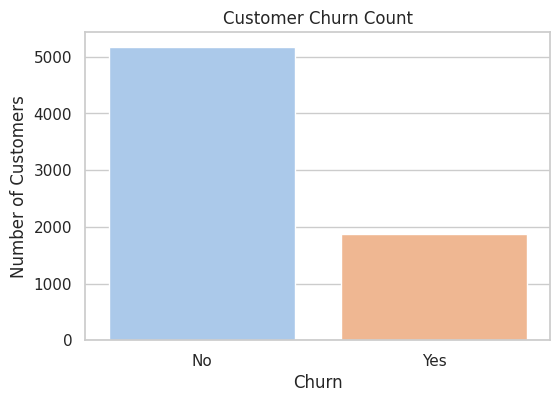

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot countplot (histogram-like for categorical data)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')

plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


/tmp/ipython-input-67649009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')
/tmp/ipython-input-67649009.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = churn_percent[i]


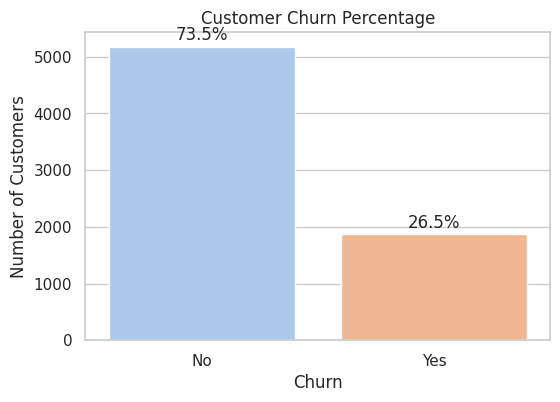

In [ ]:
# Checking Class Distribution

churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, palette='pastel')

# Annotate bars
for i, count in enumerate(churn_counts):
    pct = churn_percent[i]
    ax.text(i, count + 50, f'{pct:.1f}%', ha='center', va='bottom')

plt.title('Customer Churn Percentage')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


The above Customer Churn Percentage Chart shows the class distribution for the Target Variable. The current data is imbalanced with 'Not Churned' as the Dominant Class. Even though it is a good sign for the company, yet the Churn Percentage is quite High with 26.5%.

In [ ]:
# Checking Unique Values in Each Column

for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} ({df[column].dtype}):")
    print(unique_values)
    print("-" * 50)


customerID (object):
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender (object):
['Female' 'Male']
--------------------------------------------------
SeniorCitizen (int64):
[0 1]
--------------------------------------------------
Partner (object):
['Yes' 'No']
--------------------------------------------------
Dependents (object):
['No' 'Yes']
--------------------------------------------------
tenure (int64):
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService (object):
['No' 'Yes']
--------------------------------------------------
MultipleLines (object):
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService (object):

In [ ]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [ ]:
import pandas as pd
print(pd.__version__)


2.2.2


In [ ]:
# Make a copy to preserve original
df_numeric = df.copy()

# Convert TotalCharges to numeric
df_numeric['TotalCharges'] = pd.to_numeric(df_numeric['TotalCharges'], errors='coerce')

# Drop customerID (not useful for ML)
df_numeric.drop('customerID', axis=1, inplace=True)

# Convert Churn to binary
df_numeric['Churn'] = df_numeric['Churn'].map({'Yes': 1, 'No': 0})

# Map gender to binary
df_numeric['gender'] = df_numeric['gender'].map({'Female': 0, 'Male': 1})

# Map all other Yes/No binary columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# Replace "No internet service" and "No phone service" with "No" in related columns
cols_to_clean = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
    df_numeric[col] = df_numeric[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# One-hot encode remaining multi-class categorical columns
df_numeric = pd.get_dummies(df_numeric, drop_first=True)

# Final preview
print(df_numeric.head())
print("\nData types:\n", df_numeric.dtypes)
print("\nShape:", df_numeric.shape)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              0               0             1                 0            0   
1              0               1             0                 1            0   
2              0               1             1                 0            0   
3              0               1             0                 1            1   
4              0               0             0                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0            0   

In [ ]:
df_numeric

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,True,False,False,False,False,False,True


In [ ]:
# Load data
df = pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Make a copy to preserve original
df_numeric = df.copy()

# Convert TotalCharges to numeric
df_numeric['TotalCharges'] = pd.to_numeric(df_numeric['TotalCharges'], errors='coerce')

# Drop customerID (not useful for ML)
df_numeric.drop('customerID', axis=1, inplace=True)

# Convert Churn to binary
df_numeric['Churn'] = df_numeric['Churn'].map({'Yes': 1, 'No': 0})

# Map gender to binary
df_numeric['gender'] = df_numeric['gender'].map({'Female': 0, 'Male': 1})

# Map all other Yes/No binary columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# Replace "No internet service" and "No phone service" with "No" in related columns
cols_to_clean = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
    df_numeric[col] = df_numeric[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical columns
df_numeric = pd.get_dummies(df_numeric, drop_first=True)

# Convert any boolean columns to integers (True/False → 1/0)
df_numeric = df_numeric.astype({col: 'int' for col in df_numeric.select_dtypes(include='bool').columns})

# Final preview
print(df_numeric.head())
print("\nData types:\n", df_numeric.dtypes)
print("\nShape:", df_numeric.shape)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              0               0             1                 0            0   
1              0               1             0                 1            0   
2              0               1             1                 0            0   
3              0               1             0                 1            1   
4              0               0             0                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0            0   

In [ ]:
df_numeric

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,1,0,0,0,0,0,1


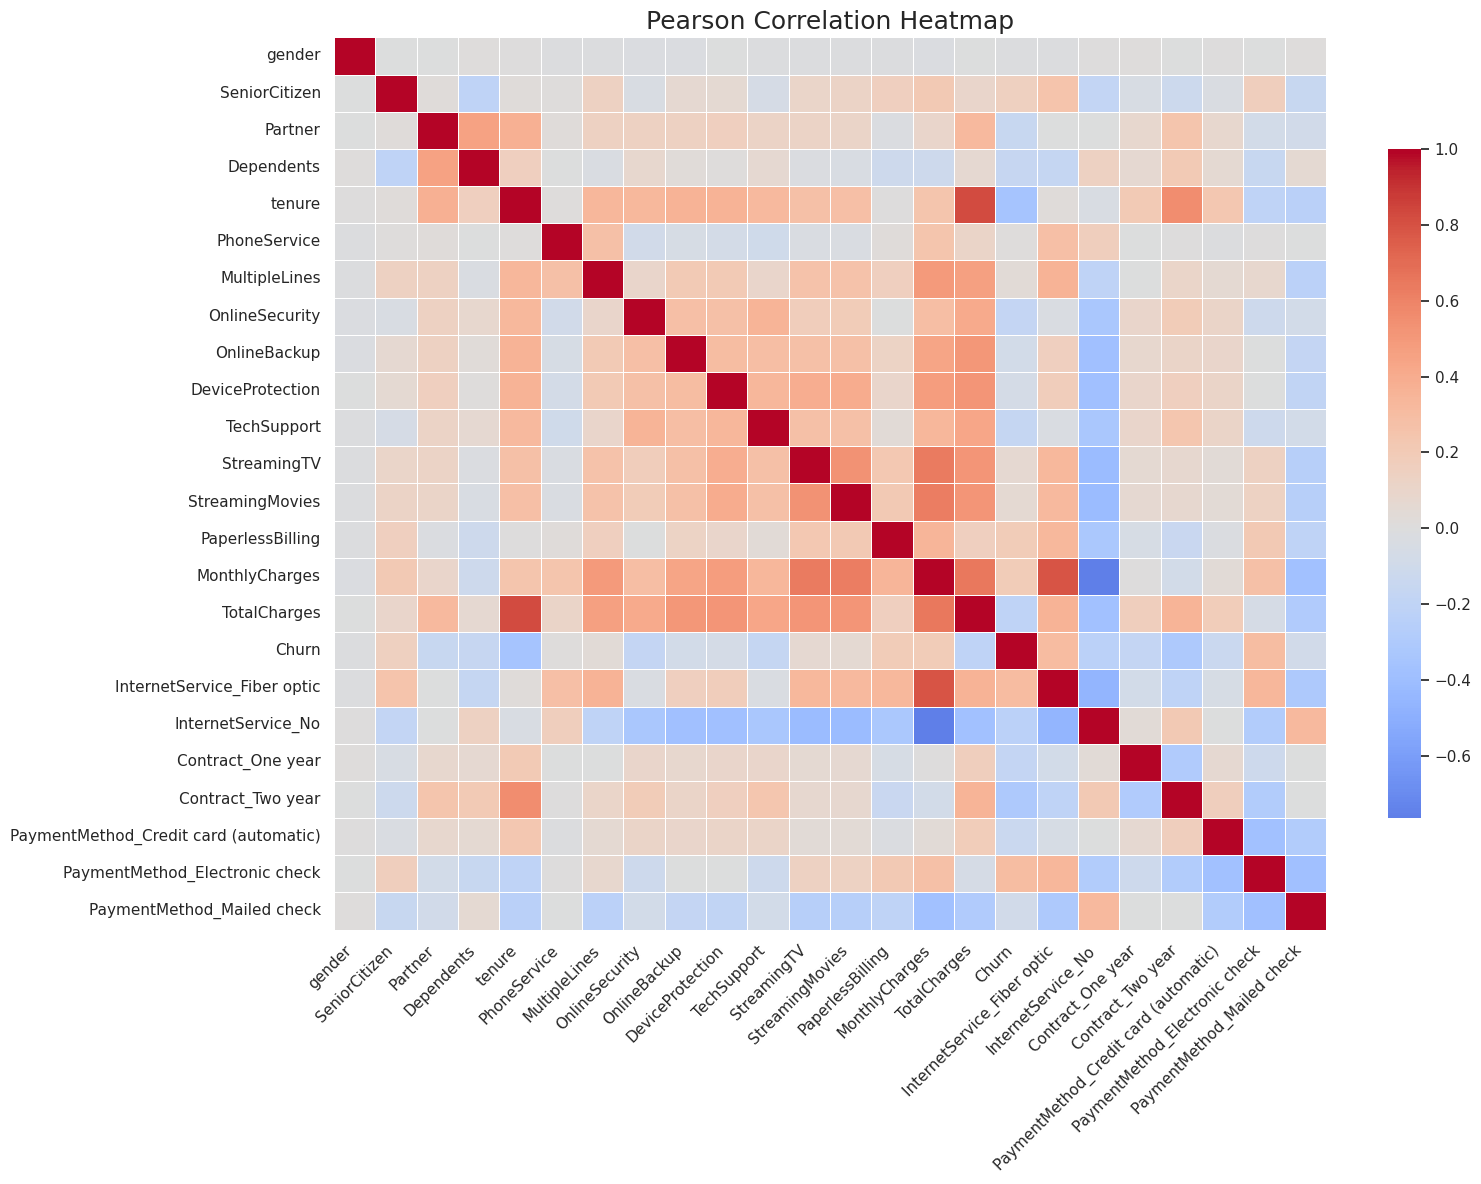

In [ ]:
# Compute Pearson correlation matrix
corr_matrix = df_numeric.corr(method='pearson')

# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            annot=False,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})

plt.title("Pearson Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Get Pearson correlations of all variables with Churn
churn_corr = df_numeric.corr(method='pearson')['Churn'].sort_values(ascending=False)

# Display the correlations
print(churn_corr)


Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender                                  -0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820


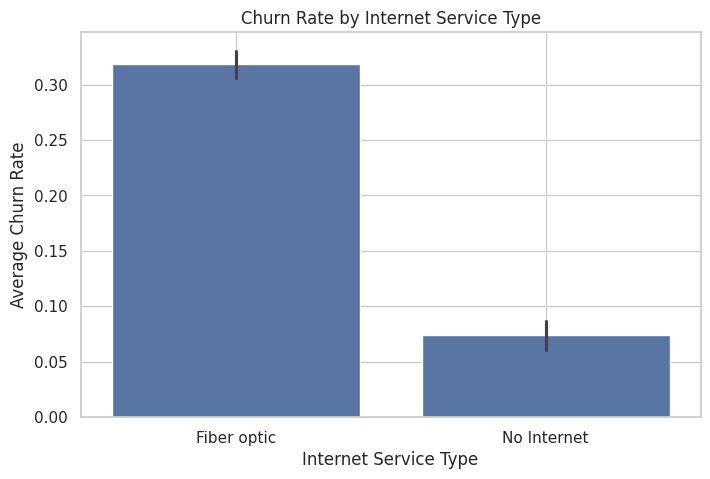

In [ ]:
# Creating a new column for internet service type from dummy columns
df_numeric['InternetService'] = df_numeric[['InternetService_Fiber optic', 'InternetService_No']].idxmax(axis=1)
df_numeric['InternetService'] = df_numeric['InternetService'].map({
    'InternetService_Fiber optic': 'Fiber optic',
    'InternetService_No': 'No Internet',
}).fillna('DSL')

# Plotting churn rate by Internet Service type
plt.figure(figsize=(8, 5))
sns.barplot(data=df_numeric, x='InternetService', y='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Average Churn Rate')
plt.xlabel('Internet Service Type')
plt.grid(True)
plt.show()


The Chart Compares the Churn Rate by Internet Service Type, showing customers using Fiber Optic having a higher Rate of Churn.

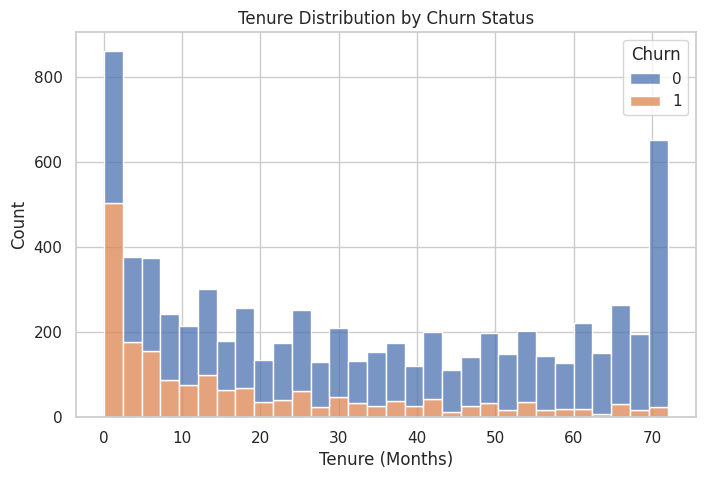

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_numeric, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.grid(True)
plt.show()


The chart shows the distribution of customer tenure (in months) by churn status. We observe that churn is heavily concentrated among new customers, particularly within the first 0–7 months, suggesting that early experiences play a critical role in customer retention. After this initial high-risk period, the likelihood of churn declines and stabilises, indicating that customers who remain beyond the first few months are more likely to stay longer.

A second peak of customers is visible around 70 months, where most are non-churners, highlighting long-term loyalty. This suggests that retention strategies should focus on improving early onboarding and engagement, as successfully retaining customers in the first year significantly increases the chance of long-term loyalty.

### Business Insight

This analysis shows a clear relationship between contract type and churn.
Customers on month-to-month contracts exhibit significantly higher churn rates
compared to those on long-term contracts.

**Business implication:** Contract structure is a key retention lever and should
be prioritized in churn reduction strategies.


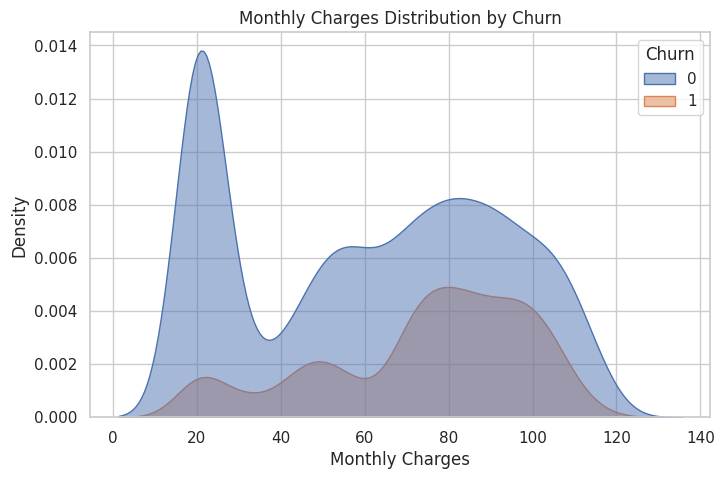

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_numeric, x='MonthlyCharges', hue='Churn', fill=True, alpha=0.5)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.grid(True)
plt.show()


The chart shows the distribution of monthly charges by churn status. Customers with lower monthly charges (around £20–30) are less likely to churn, as seen by the sharp peak in the non-churn group. However, as charges increase, particularly between £60 and £100, the churn density rises considerably. This suggests that higher-paying customers are more sensitive to service value and may leave if their expectations are not met.

Overall, churn is more prevalent among customers with mid-to-high monthly charges, highlighting the need for retention strategies such as value-added services, loyalty benefits, or targeted offers to justify higher costs.

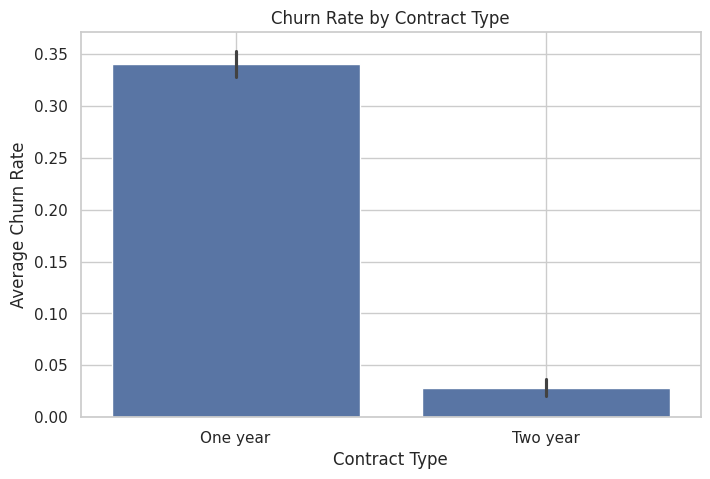

In [ ]:
# Recover contract type from dummy columns
df_numeric['Contract'] = df_numeric[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df_numeric['Contract'] = df_numeric['Contract'].map({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

# Plot churn rate
plt.figure(figsize=(8, 5))
sns.barplot(data=df_numeric, x='Contract', y='Churn')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Average Churn Rate')
plt.xlabel('Contract Type')
plt.grid(True)
plt.show()


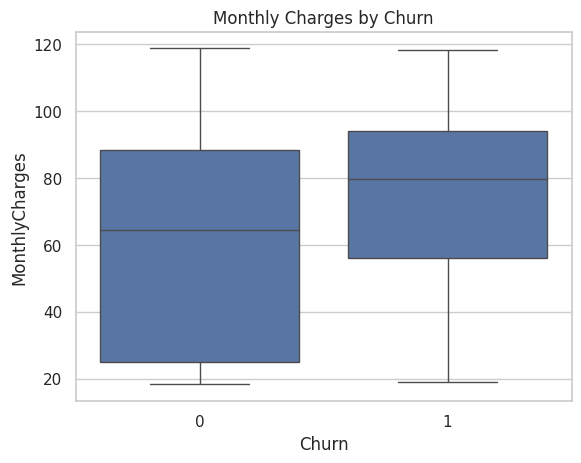

In [ ]:
sns.boxplot(data=df_numeric, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()


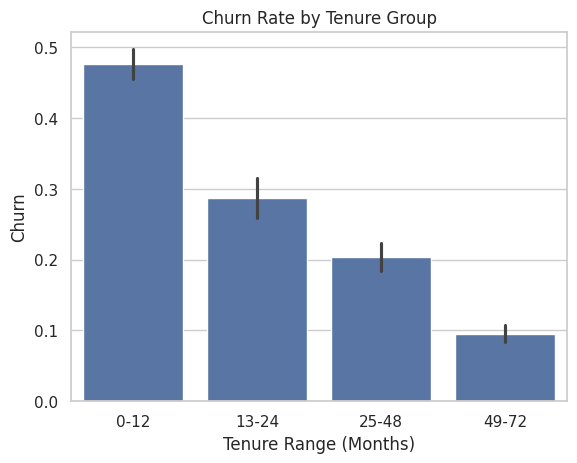

In [ ]:
df_numeric['tenure_bin'] = pd.cut(df_numeric['tenure'], bins=[0, 12, 24, 48, 72],
                                  labels=['0-12', '13-24', '25-48', '49-72'])

sns.barplot(data=df_numeric, x='tenure_bin', y='Churn')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Range (Months)')
plt.show()



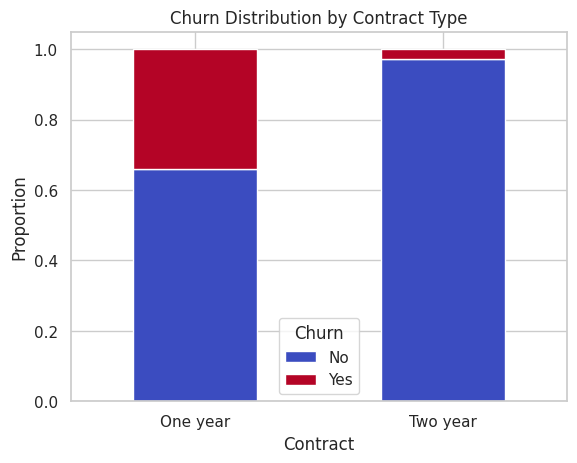

In [ ]:
contract_churn = df_numeric.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Churn Distribution by Contract Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


Applying undersampling to the data to balance both classes since the 'Yes' category is very less compared to the 'No' category posing risk to a biased model and biased outcomes.

### Business Insight

This analysis shows a clear relationship between contract type and churn.
Customers on month-to-month contracts exhibit significantly higher churn rates
compared to those on long-term contracts.

**Business implication:** Contract structure is a key retention lever and should
be prioritized in churn reduction strategies.


## Feature Engineering and Model Preparation

In [ ]:
# Churn = 1 is minority, Churn = 0 is majority
df_majority = df_numeric[df_numeric['Churn'] == 0]
df_minority = df_numeric[df_numeric['Churn'] == 1]

# Randomly sample from majority class to match minority class count
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)


In [ ]:
df_balanced = pd.concat([df_majority_undersampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Churn'].value_counts())


Churn
0    1869
1    1869
Name: count, dtype: int64


In [ ]:
df_balanced

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService,Contract,tenure_bin
0,0,0,0,1,18,1,1,1,0,0,0,0,0,0,57.65,992.70,0,0,0,0,0,0,0,1,Fiber optic,One year,13-24
1,0,0,1,1,56,1,1,1,0,1,0,0,1,1,68.75,3808.00,0,0,0,1,0,0,0,0,Fiber optic,One year,49-72
2,1,0,0,0,15,1,0,0,0,0,0,0,0,0,19.80,304.60,0,0,1,1,0,0,0,1,No Internet,One year,13-24
3,1,0,1,1,38,1,1,0,1,1,0,1,1,0,78.95,2862.55,0,0,0,1,0,1,0,0,Fiber optic,One year,25-48
4,0,0,1,0,71,1,1,1,1,1,1,1,1,0,89.30,6388.65,0,0,0,0,1,1,0,0,Fiber optic,Two year,49-72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,1,1,72,1,0,1,1,0,1,1,0,0,68.40,4855.35,0,0,0,0,1,0,0,0,Fiber optic,Two year,49-72
3734,0,1,1,0,36,1,1,0,1,0,0,1,0,1,91.95,3301.05,0,1,0,0,0,1,0,0,Fiber optic,One year,25-48
3735,1,0,0,0,26,1,0,0,0,0,0,0,0,0,19.80,457.30,0,0,1,1,0,1,0,0,No Internet,One year,25-48
3736,1,1,0,0,43,1,0,0,0,0,0,1,1,1,89.55,3856.75,1,1,0,0,0,0,0,1,Fiber optic,One year,25-48


Applying standard scaling to standardise the features

In [ ]:


numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_balanced[numeric_cols] = scaler.fit_transform(df_balanced[numeric_cols])


In [ ]:
df_balanced

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService,Contract,tenure_bin
0,0,0,0,1,-0.410232,1,1,1,0,0,0,0,0,0,-0.350823,-0.484083,0,0,0,0,0,0,0,1,Fiber optic,One year,13-24
1,0,0,1,1,1.164703,1,1,1,0,1,0,0,1,1,0.032567,0.799648,0,0,0,1,0,0,0,0,Fiber optic,One year,49-72
2,1,0,0,0,-0.534569,1,0,0,0,0,0,0,0,0,-1.658147,-0.797845,0,0,1,1,0,0,0,1,No Internet,One year,13-24
3,1,0,1,1,0.418681,1,1,0,1,1,0,1,1,0,0.384871,0.368538,0,0,0,1,0,1,0,0,Fiber optic,One year,25-48
4,0,0,1,0,1.786388,1,1,1,1,1,1,1,1,0,0.742356,1.976381,0,0,0,0,1,1,0,0,Fiber optic,Two year,49-72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,1,1,1.827834,1,0,1,1,0,1,1,0,0,0.020478,1.277222,0,0,0,0,1,0,0,0,Fiber optic,Two year,49-72
3734,0,1,1,0,0.335790,1,1,0,1,0,0,1,0,1,0.833886,0.568487,0,1,0,0,0,1,0,0,Fiber optic,One year,25-48
3735,1,0,0,0,-0.078667,1,0,0,0,0,0,0,0,0,-1.658147,-0.728216,0,0,1,1,0,1,0,0,No Internet,One year,25-48
3736,1,1,0,0,0.625910,1,0,0,0,0,0,1,1,1,0.750991,0.821877,1,1,0,0,0,0,0,1,Fiber optic,One year,25-48


In [ ]:


le = LabelEncoder()
for col in ['InternetService', 'Contract', 'tenure_bin']:
    df_balanced[col] = le.fit_transform(df_balanced[col])

print(df_balanced.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           1 -0.410232             1   
1       0              0        1           1  1.164703             1   
2       1              0        0           0 -0.534569             1   
3       1              0        1           1  0.418681             1   
4       0              0        1           0  1.786388             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              1               1             0                 0            0   
1              1               1             0                 1            0   
2              0               0             0                 0            0   
3              1               0             1                 1            0   
4              1               1             1                 1            1   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0    

## Predictive Modeling and Evaluation

In [ ]:
X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7709447415329769
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       561
           1       0.78      0.75      0.77       561

    accuracy                           0.77      1122
   macro avg       0.77      0.77      0.77      1122
weighted avg       0.77      0.77      0.77      1122



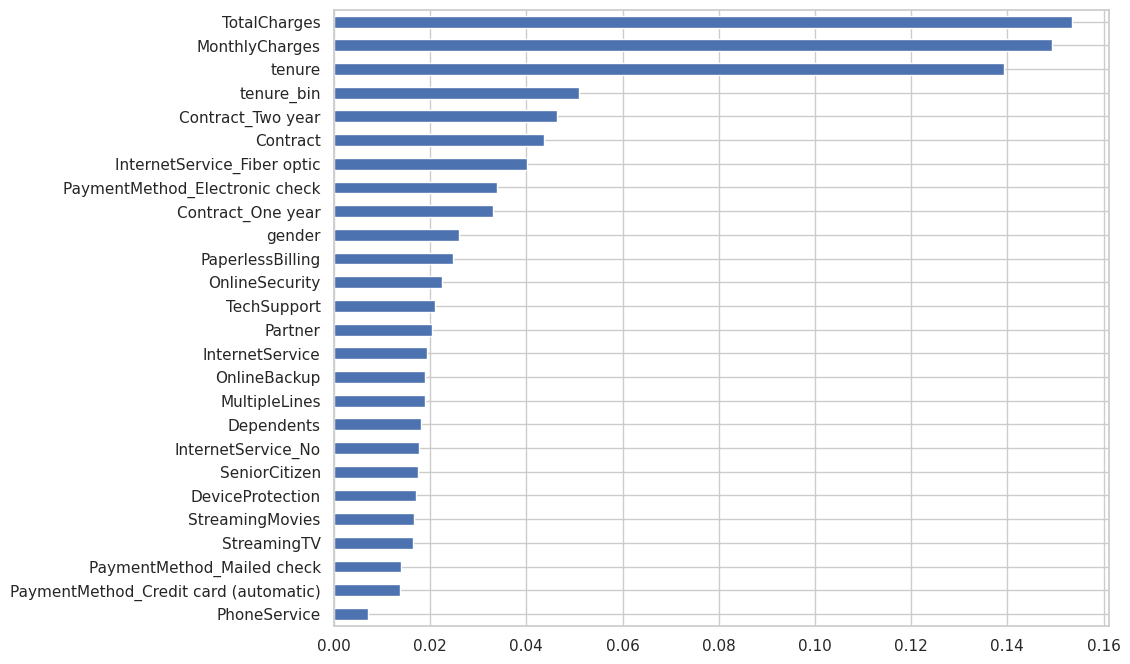

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,8))
plt.show()


Now Trying Hyperparameter Optimisation with more Parameters to see how the new enhanced Model Performs

In [ ]:


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


# Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


applying these best params on the data

Accuracy: 0.786096256684492

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       561
           1       0.79      0.78      0.78       561

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



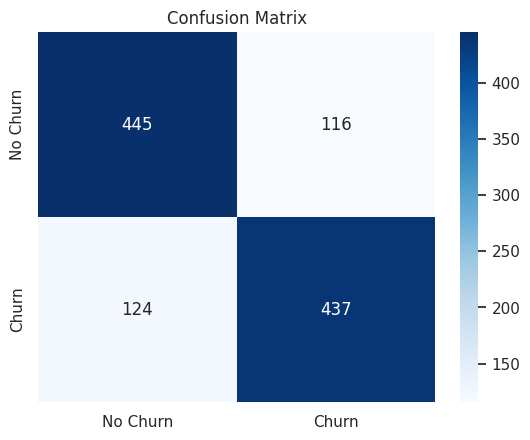

In [ ]:



# Train with best params
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.title("Confusion Matrix")
plt.show()



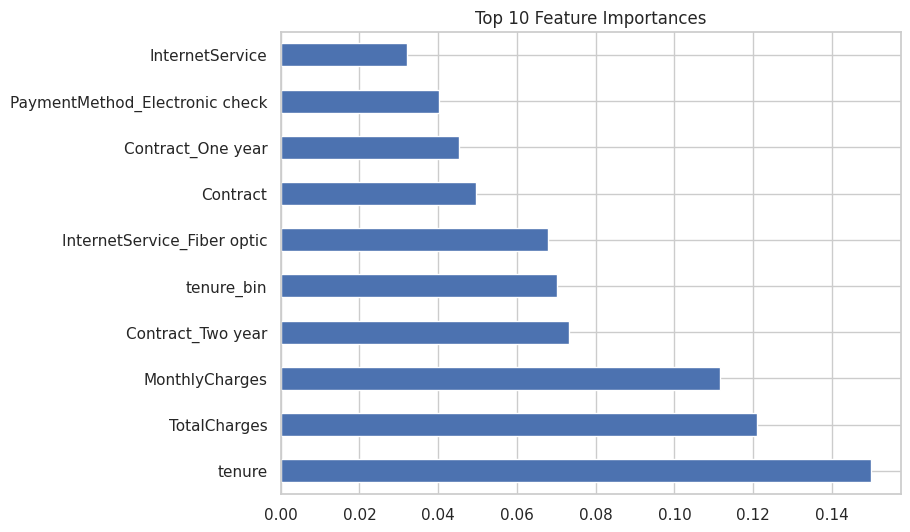

In [ ]:


feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
# Save the trained model
joblib.dump(best_rf, "churn_model.pkl")
print("Model saved as churn_model.pkl")


In [ ]:
# Load the model
loaded_model = joblib.load("churn_model.pkl")

# Test prediction
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)
print("Actual:", y_test[:5].values)


In [ ]:
# from google.colab import drive
# import joblib

# # 1. Mount Google Drive
# drive.mount('/content/drive')

# 2. Define path (change folder path to where you want to save)
model_path = "/content/drive/MyDrive/Churn_Project/churn_model.pkl"

# 3. Save the model
joblib.dump(best_rf, model_path)
print(f"✅ Model saved to: {model_path}")

# 4. Load the model back
loaded_model = joblib.load(model_path)
print("✅ Model loaded successfully!")

# 5. Test prediction with loaded model
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)
print("Actual:", y_test[:5].values)


✅ Model saved to: /content/drive/MyDrive/Churn_Project/churn_model.pkl
✅ Model loaded successfully!
Sample Predictions: [0 0 0 0 1]
Actual: [0 0 0 0 1]


## Business Interpretation of Model Results

ROC AUC Score: 0.8551907880313039


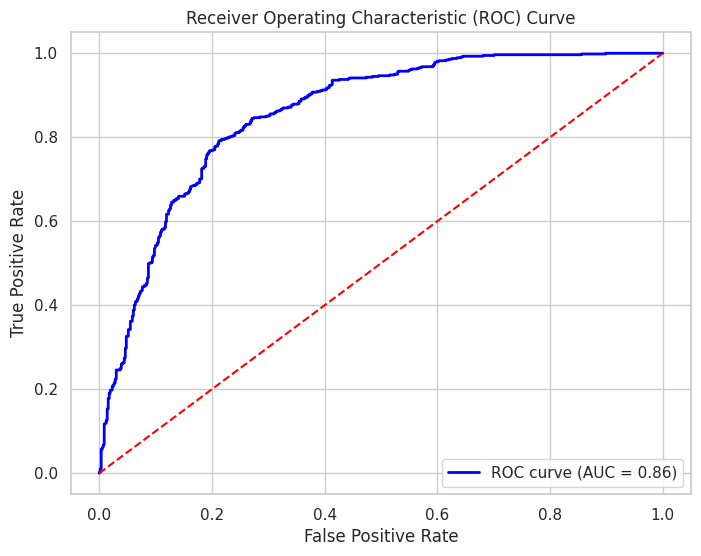

In [ ]:


# Get predicted probabilities for the positive class (Churn = 1)
y_pred_proba = best_rf.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC score
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Business Interpretation of Model Results

The trained machine learning model demonstrates strong predictive performance
in identifying customers at risk of churn. Rather than replacing human decision-
making, this model is intended to support business teams by prioritizing
customers for retention efforts.

In a real-world setting, customers with high predicted churn probability could
be flagged monthly and targeted with personalized offers, loyalty incentives,
or service interventions.


### Business Risk Considerations

- False negatives (missed churners) may result in direct revenue loss
- False positives may lead to unnecessary retention incentives
- Threshold selection should balance retention cost against customer lifetime value


## Business Recommendations

Based on the analysis and model results, the following actions are recommended:

1. Encourage month-to-month customers to switch to longer-term contracts through
   targeted discounts or loyalty benefits
2. Prioritize retention efforts for customers with high monthly charges and low tenure
3. Integrate the churn prediction model into a monthly monitoring pipeline
4. Use A/B testing to measure the effectiveness of retention campaigns


## Limitations and Future Work

- The dataset does not include customer service interaction or complaint data,
  which could further improve predictive accuracy
- The model is trained on historical data and may require retraining over time
- Future work could include real-time churn prediction and advanced ensemble models


## Conclusion

This project demonstrates how data science can be applied to solve a real-world
business problem by combining exploratory analysis, predictive modeling, and
business-oriented interpretation. The approach emphasizes not only model
performance but also actionable insights that drive decision-making.
